In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('H1B Disclosure Dataset Files//1. Master H1B Dataset.csv',low_memory=False,na_values=['','NA'])
data.shape

(528134, 27)

In [3]:
pd.options.display.max_columns = 100

In [4]:
data.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,59197.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,49800.0,Year,Other,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,ANALYSTS,541511.0,2,Y,76502.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541511.0,1,Y,90376.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,ANALYSTS,522110.0,1,Y,116605.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN


In [5]:
filter_2015 = data[data['CASE_SUBMITTED_YEAR']==2015]
filter_2015.shape

(7466, 27)

In [6]:
filter_2016 = data[data['CASE_SUBMITTED_YEAR']==2016]
filter_2016.shape

(100161, 27)

In [7]:
filter_2017 = data[data['CASE_SUBMITTED_YEAR']==2017]
filter_2017.shape

(415465, 27)

I am going to build the model on filtered data for CASE_SUBMITTED_YEAR = 2016 and see if some patterns emerge.

In [8]:
h1b = filter_2016.copy()
h1b.shape

(100161, 27)

In [9]:
h1b = h1b.reset_index(drop=True)

In [10]:
h1b.head()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,59197.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,ANALYSTS,522210.0,1,Y,49800.0,Year,Other,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
2,10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,ANALYSTS,541511.0,2,Y,76502.0,Year,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
3,28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541511.0,1,Y,90376.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
4,25,2,2016,2,10,2016,H1B,CITADEL INFORMATION SERVICES INC,NJ,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541511.0,1,Y,52915.0,Year,Other,2015.0,ONLINE WAGE LIBRARY,61000.0,0.0,Year,Y,N,NJ,8837,CERTIFIEDWITHDRAWN


## Data Cleaning 

In [11]:
#convert the column names to lower_case letters and rename column 'h-1b_dependent' to 'h1b_dependent'
cols = [col.lower() for col in h1b.columns.values]
cols[cols.index('h-1b_dependent')] = 'h1b_dependent'
cols

['case_submitted_day',
 'case_submitted_month',
 'case_submitted_year',
 'decision_day',
 'decision_month',
 'decision_year',
 'visa_class',
 'employer_name',
 'employer_state',
 'employer_country',
 'soc_name',
 'naics_code',
 'total_workers',
 'full_time_position',
 'prevailing_wage',
 'pw_unit_of_pay',
 'pw_source',
 'pw_source_year',
 'pw_source_other',
 'wage_rate_of_pay_from',
 'wage_rate_of_pay_to',
 'wage_unit_of_pay',
 'h1b_dependent',
 'willful_violator',
 'worksite_state',
 'worksite_postal_code',
 'case_status']

In [12]:
#change the dataset columns to new names
h1b.columns = cols

In [13]:
#see the datatype of columns and non missing values
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100161 entries, 0 to 100160
Data columns (total 27 columns):
case_submitted_day       100161 non-null int64
case_submitted_month     100161 non-null int64
case_submitted_year      100161 non-null int64
decision_day             100161 non-null int64
decision_month           100161 non-null int64
decision_year            100161 non-null int64
visa_class               100161 non-null object
employer_name            100155 non-null object
employer_state           100157 non-null object
employer_country         100161 non-null object
soc_name                 100161 non-null object
naics_code               100161 non-null float64
total_workers            100161 non-null int64
full_time_position       100161 non-null object
prevailing_wage          100161 non-null float64
pw_unit_of_pay           100152 non-null object
pw_source                100154 non-null object
pw_source_year           100153 non-null float64
pw_source_other          1001

We can see from above output that columns 'employer_name','employer_state','pw_unit_of_pay','pw_source','pw_source_year', 'h1b_dependent','willful_violator' contain null values. I will address this issue a little later. 

We need to change worksite_postal_code to float type and all other columns are correctly mapped to datatypes so we dont need to change this.

In [14]:
#change worksite_postal_code to float

h1b.worksite_postal_code = h1b.worksite_postal_code.astype(np.float64)

In [15]:
h1b.describe().T

,count,mean,std,min,25%,50%,75%,max
case_submitted_day,100161.0,16.006649,8.863295,1.0,8.0,16.0,23.00,31.0
case_submitted_month,100161.0,10.080201,2.505056,1.0,10.0,11.0,12.00,12.0
case_submitted_year,100161.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.00,2016.0
decision_day,100161.0,15.477691,8.782555,1.0,7.0,15.0,22.00,31.0
decision_month,100161.0,9.920648,2.992371,1.0,10.0,11.0,12.00,12.0
decision_year,100161.0,2016.129671,0.335943,2016.0,2016.0,2016.0,2016.00,2017.0
naics_code,100161.0,431445.684418,208486.362556,1114.0,339112.0,541511.0,541511.00,928120.0
total_workers,100161.0,1.947934,4.770508,1.0,1.0,1.0,1.00,155.0
prevailing_wage,100161.0,75372.088165,31875.062345,0.0,58968.0,72654.0,91458.00,350000.0
pw_source_year,100153.0,2015.884147,6.376130,1.0,2016.0,2016.0,2016.00,2016.0


We can drop case_submitted_year from our dataset as this field does not add any information in current dataset. We will also need to normalize the data.

We need to check the columns prevailing_wage, pw_source_year, wage_rate_of_pay_from and wage_rate_of_pay_to for data correctness because of the minimum values 0/1 which is kinda odd for these columns.


In [16]:
#drop case_submitted_year column

h1b = h1b.drop('case_submitted_year',axis = 1)

Before going further into cleaning part let us check the categorical variables as well.

In [17]:
#function to get column names
def get_column_names(df):
    cols = df.columns.values
    num_cols = df.describe().columns.values
    cat_cols = [col for col in cols if col not in(num_cols)]
    return cols,num_cols,cat_cols

In [18]:
#get the column names
cols,num_cols,cat_cols = get_column_names(h1b)
print num_cols
print cat_cols

['case_submitted_day' 'case_submitted_month' 'decision_day'
 'decision_month' 'decision_year' 'naics_code' 'total_workers'
 'prevailing_wage' 'pw_source_year' 'wage_rate_of_pay_from'
 'wage_rate_of_pay_to' 'worksite_postal_code']
['visa_class', 'employer_name', 'employer_state', 'employer_country', 'soc_name', 'full_time_position', 'pw_unit_of_pay', 'pw_source', 'pw_source_other', 'wage_unit_of_pay', 'h1b_dependent', 'willful_violator', 'worksite_state', 'case_status']


In [19]:
h1b[cat_cols].describe().T

,count,unique,top,freq
visa_class,100161,4,H1B,96577
employer_name,100155,16862,INFOSYS LIMITED,3937
employer_state,100157,56,CA,16365
employer_country,100161,2,UNITED STATES OF AMERICA,100157
soc_name,100161,56,COMPUTER OCCUPATION,46995
full_time_position,100161,2,Y,98551
pw_unit_of_pay,100152,5,Year,94979
pw_source,100154,5,OES,81060
pw_source_other,100161,93,OFLC ONLINE DATA CENTER,93891
wage_unit_of_pay,100161,5,Year,94993


We need to check for columns
employer_country because of 2 values (supposed to be only 1 USA!)

employer_name, employer_state,worksite_state,soc_name,pw_source_other can be encoded using label encoder from sklearn

Now, Let us check the columns prevailing_wage, pw_source_year, wage_rate_of_pay_from and wage_rate_of_pay_to for data correctness

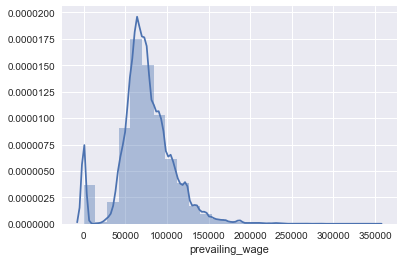

In [20]:
%matplotlib inline
sns.distplot(h1b['prevailing_wage'],bins = 25)

Possible outliers could be 0 from minimum limit and anything above 250K for maximum limit. I need to validate data for data correctness.

In [21]:
h1b[h1b['prevailing_wage'] ==0]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
1306,28,9,3,10,2016,H1B,DOUGLAS COUNTY,IL,UNITED STATES OF AMERICA,MARKETING,9211.0,2,Y,0.0,NaN,NaN,NaN,NONE,105000.0,0.0,Year,Y,N,IL,61944.0,DENIED
12534,7,10,14,10,2016,E3 Australian,SIM VIDEO LOS ANGELES INC,CA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,512191.0,1,Y,0.0,NaN,NaN,NaN,NONE,20.0,0.0,Hour,NaN,NaN,CA,90038.0,DENIED
43530,11,11,16,11,2016,H1B1 Chile,LA GAUCHITA BAKERY INC,FL,UNITED STATES OF AMERICA,MARKETING,31181.0,1,Y,0.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,6000.0,0.0,Month,NaN,NaN,FL,33149.0,DENIED
48490,17,11,21,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,UNITED STATES OF AMERICA,PUBLIC RELATIONS,541611.0,1,Y,0.0,NaN,NaN,NaN,NONE,150000.0,0.0,Year,NaN,NaN,CA,92618.0,DENIED
56828,23,11,30,11,2016,H1B,PECAN POINT OKLAHOMA LLC,FL,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,1119.0,10,Y,0.0,Hour,Other,2016.0,NONE,12.0,15.0,Hour,N,N,OK,74740.0,DENIED
57371,28,11,30,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,UNITED STATES OF AMERICA,MARKETING,541611.0,1,Y,0.0,NaN,NaN,NaN,NONE,150000.0,0.0,Year,NaN,NaN,CA,92618.0,DENIED
59222,29,11,2,12,2016,H1B,DAN BRADLEY GLASS SHOP INC,NV,UNITED STATES OF AMERICA,SCIENTIST,238150.0,1,Y,0.0,NaN,NaN,NaN,NONE,9.0,12.0,Hour,N,N,NV,89102.0,DENIED
78290,19,12,21,12,2016,E3 Australian,THE GUARANTEE COMPANY OF NORTH AMERICA USA,MI,UNITED STATES OF AMERICA,SCIENTIST,524126.0,1,Y,0.0,NaN,NaN,NaN,NONE,90000.0,0.0,Year,NaN,NaN,MI,48076.0,DENIED
89481,30,12,4,1,2017,H1B,OPTIMUS CONSTRUCTION INC,CA,UNITED STATES OF AMERICA,DOCTORS,236116.0,1,Y,0.0,NaN,NaN,NaN,NONE,80000.0,0.0,Year,N,N,CA,91201.0,DENIED


The prevailing wage for a worksite state for particulr soc_name will be same. We can impute the prevailing_wage value by matching the value for corresponding worksite_state, soc_name and pw_unit_of_pay.

One thing to notice here is that the case_status for each of these cases is 'DENIED'. Deleting all these valus may not be the best solution in our case, since we already have very less cases with 'DENIED' status.

We can calculate median prevailing_wage value based on worksite_state, soc_name, wage_unit_of_pay. This median value can be imputed inplace of 0's in our dataset.

In [22]:
#impute prevailing_wage values
row_index = h1b.index[h1b['prevailing_wage'] ==0]
#print 'Index\tWorksite_State\tsoc_name\twg_unit\tpw_median'
val = None
for index in row_index:
    work_state = h1b.loc[index,'worksite_state']
    soc_name = h1b.loc[index,'soc_name']
    wg_unit = h1b.loc[index,'wage_unit_of_pay']
    
    pw_med = h1b[(h1b.worksite_state == work_state) & (h1b.soc_name == soc_name) \
                & (h1b.pw_unit_of_pay == wg_unit)].prevailing_wage.median()
    
    #print '%d\t%s\t\t%s\t%s\t%.2f'%(index,work_state,soc_name,wg_unit,pw_med)
    if pw_med:
        h1b.loc[index,'prevailing_wage'] = pw_med

In [23]:
h1b.loc[row_index].prevailing_wage

1306     64834.00
12534       35.13
43530         NaN
48490    87838.00
56828       18.89
57371    95326.50
59222       25.18
78290    69825.50
89481    94619.00
Name: prevailing_wage, dtype: float64

In [24]:
#check for prevailing_wage > 250,000
h1b[h1b['prevailing_wage'] > 250000]


,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
140,27,9,3,10,2016,E3 Australian,AHOLD USA INC,MA,UNITED STATES OF AMERICA,ANALYSTS,445110.0,1,Y,267800.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,510000.00,0.0,Year,NaN,NaN,MA,2021.0,CERTIFIED
550,27,9,3,10,2016,H1B,HEALTH SERVICES OF CENTRAL GEORGIA INC,GA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,622110.0,1,Y,268258.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,371000.00,0.0,Year,N,N,GA,31201.0,CERTIFIED
1842,28,9,4,10,2016,H1B,DEPARTMENT OF VETERANS AFFAIRS VA BOSTON HEALT...,MA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,923140.0,1,Y,283421.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,285000.00,0.0,Year,N,N,MA,2132.0,CERTIFIED
1985,28,9,4,10,2016,H1B,HEALTH SERVICES OF CENTRAL GEORGIA INC,GA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,62211.0,1,Y,268258.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,371000.00,0.0,Year,N,N,GA,31201.0,CERTIFIED
5313,4,10,6,10,2016,H1B,NORTHSTAR ANESTHESIA OF MICHIGAN PLLC,TX,UNITED STATES OF AMERICA,MARKETING,541690.0,1,Y,336000.0,Year,Other,2014.0,WILLIS TOWERS WATSON SURVEY,375000.00,0.0,Year,N,N,MI,48201.0,DENIED
5314,4,10,6,10,2016,H1B,NORTHSTAR ANESTHESIA OF MICHIGAN PLLC,TX,UNITED STATES OF AMERICA,MARKETING,541690.0,1,Y,336000.0,Year,Other,2014.0,WILLIS TOWERS WATSON SURVEY,375000.00,0.0,Year,N,N,MI,48201.0,DENIED
6656,4,10,7,10,2016,H1B,NORTHSTAR ANESTHESIA OF MICHIGAN PLLC,TX,UNITED STATES OF AMERICA,MARKETING,541690.0,1,Y,336000.0,Year,Other,2014.0,WILLIS TOWERS WATSON SURVEY,350000.00,0.0,Year,N,N,MI,48201.0,DENIED
7075,4,10,11,10,2016,H1B,CENTER FOR GLOBAL DEVELOPMENT,DC,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541720.0,1,Y,256589.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,415000.00,0.0,Year,N,N,DC,20036.0,CERTIFIED
7185,4,10,11,10,2016,E3 Australian,DELUXE CORPORATION,MN,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,561439.0,1,Y,267800.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,267800.00,0.0,Year,NaN,NaN,MA,1471.0,CERTIFIED
7345,4,10,11,10,2016,H1B,ICAHN SCHOOL OF MEDICINE AT MOUNT SINAI,NY,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,622110.0,1,Y,284211.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,600000.00,0.0,Year,N,N,NY,10029.0,CERTIFIED


All of these wages are related to the high pay grade job profiles and the employers are also well reputed. But still wages above 250K seems unrealistic to me at this point. If there was a way to validate these wages I would do that. In this case, I am going to assume that its incorrect. I will impute the median values of the wages based on worksite_state, soc_name.

In [25]:
#function to impute median wages based on employer_state and soc_name for that state
def impute_wages(col_name,limit):
    row_index = h1b.index[h1b[col_name] > limit]
    wage_dict = {}
    for index in row_index:
        st = h1b.loc[index].worksite_state
        soc_name = h1b.loc[index].soc_name
        if (st,soc_name) in wage_dict.keys():
            h1b.loc[index,col_name] = wage_dict[(st,soc_name)]
        else:
            #compute median for state and soc_name
            med = h1b[(h1b.worksite_state == st) & (h1b.soc_name == soc_name)].prevailing_wage.median()
            wage_dict[(st,soc_name)] = med #assign new key to dictionary
            h1b.loc[index,col_name] = med            

In [26]:
impute_wages('prevailing_wage',250000)

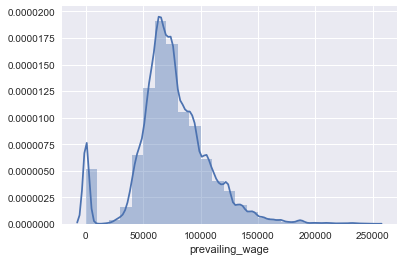

In [27]:
#check for imputation
sns.distplot(h1b['prevailing_wage'].dropna(),bins = 25)

We still see some values greater than 250K because it is the median prevailing salary for state and soc_name. Apart from this the distribution looks good.

In [28]:
h1b['pw_source_year'].value_counts()

2016.0    91127
2015.0     8747
2014.0      184
2013.0       38
2011.0       22
2012.0       12
2009.0       12
2007.0        3
2010.0        2
2001.0        2
2008.0        1
1999.0        1
1993.0        1
1.0           1
Name: pw_source_year, dtype: int64

In [29]:
h1b[h1b['pw_source_year']==1.0]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
34794,1,11,7,11,2016,H1B,RUTGERS THE STATE UNIVERSITY OF NEW JERSEY,NJ,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,611310.0,1,Y,60500.0,Year,CBA,1.0,NONE,92340.0,0.0,Year,N,N,NJ,8854.0,CERTIFIED


I can try to find a good value for pw_source_year by looking at other prevailing wage columns. Here I am trying to find different values of pw_source_year by looking at 'prevailing_wage' = 65000, 'pw_unit_of_pay'= 'Year' and 'pw_source' = 'CBA'.

In [30]:
h1b[(h1b['prevailing_wage'] == 60500) & (h1b['pw_unit_of_pay'] =='Year') & (h1b['pw_source'] == 'CBA')]['pw_source_year'].value_counts()

2016.0    6
2014.0    1
1.0       1
Name: pw_source_year, dtype: int64

From above count result, we can see that mostly the value for pw_source_year is 2016 for other prevailing wage characteristcs. I will impute 2016 for this cell.

In [31]:
row_index = h1b.index[h1b['pw_source_year'] ==1.0]
h1b.loc[row_index,'pw_source_year'] = 2016

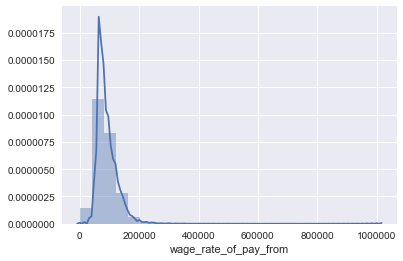

In [32]:
sns.distplot(h1b['wage_rate_of_pay_from'],bins =25)

Possible outliers for wage_rate_of_pay_from could be 0 in minimum value and anything above 400K in maximum value (since we observed prevailing wages upto 300K in prevailing_wages column. Let us validate this field for outliers.

In [33]:
h1b[h1b['wage_rate_of_pay_from']==0]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
64950,6,12,8,12,2016,H1B,SCHNEIDER ELECTRIC USA INC,MA,UNITED STATES OF AMERICA,MATHEMATICIANS AND STATISTICIANS,335311.0,1,Y,64106.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,0.0,67246.0,Year,N,N,WA,99352.0,DENIED


This is clearly a wrong typed value. The prevailing_wage is 64106 yearly. An employer has to give minimum wage rage specified in prevailing wage. So, it is correct to impute 'wage_rate_of_pay_from' = 'prevailing_wage'

In [34]:
row_index = h1b.index[h1b['wage_rate_of_pay_from']==0]
h1b.loc[row_index,'wage_rate_of_pay_from'] = h1b.loc[row_index,'prevailing_wage']

In [35]:
#check for maximum wage_rate > 400000
h1b[(h1b['wage_rate_of_pay_from']>= 400000)]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
140,27,9,3,10,2016,E3 Australian,AHOLD USA INC,MA,UNITED STATES OF AMERICA,ANALYSTS,445110.0,1,Y,71425.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,510000.0,0.0,Year,NaN,NaN,MA,2021.0,CERTIFIED
1512,29,7,4,10,2016,H1B,METRO HEALTH HOSPITAL,MI,UNITED STATES OF AMERICA,ANALYSTS,622110.0,1,Y,229112.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,450000.0,0.0,Year,N,N,MI,49519.0,CERTIFIEDWITHDRAWN
2749,3,10,4,10,2016,H1B,JACKSON CLINIC P A,TN,UNITED STATES OF AMERICA,MANAGERS,621111.0,1,Y,201531.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,400000.0,0.0,Year,N,N,TN,38301.0,WITHDRAWN
3096,29,9,5,10,2016,H1B,CLEVELAND CLINIC,OH,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,622110.0,1,Y,111176.0,Year,Other,2016.0,ONLINE WAGE LIBRARY,475000.0,0.0,Year,N,N,OH,44195.0,CERTIFIED
4211,30,9,6,10,2016,H1B,BLESSING CORPORATE SERVICES INC PARENT OF BLES...,IL,UNITED STATES OF AMERICA,BUSINESS OPERATIONS SPECIALIST,561110.0,1,Y,187200.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,425000.0,0.0,Year,N,N,IL,62305.0,CERTIFIED
4383,30,9,6,10,2016,E3 Australian,DIGITAS INC,MA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,541830.0,1,Y,147243.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,475000.0,0.0,Year,NaN,NaN,NY,10010.0,CERTIFIED
4394,30,9,6,10,2016,H1B,DUBOIS REGIONAL MEDICAL CENTER,PA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,622110.0,1,Y,228571.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,650000.0,650000.0,Year,N,N,PA,15801.0,CERTIFIED
4401,30,9,6,10,2016,H1B,EINSTEIN PRACTICE PLAN INC,PA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,622110.0,1,Y,88899.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,450000.0,0.0,Year,N,N,PA,19141.0,CERTIFIED
5316,4,10,6,10,2016,H1B,THE SCHEPENS EYE RESEARCH INSTITUTE,MA,UNITED STATES OF AMERICA,MARKETING,541710.0,1,Y,44262.0,Year,Other,2016.0,OFLC ONLINE DATA CENTER,550219.0,0.0,Year,N,N,MA,2114.0,WITHDRAWN
6880,4,10,11,10,2016,H1B,AIP LLC,NY,UNITED STATES OF AMERICA,ANALYSTS,52399.0,1,Y,212430.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,400000.0,0.0,Year,N,N,NY,10017.0,CERTIFIED


I need to modify my impute_wages function. Now I need to compare the prevailing wage with median wage and whichever is greater, I should use that for wage_rate_of_pay_from feature.

In [36]:
#function to impute median wages or prevailing wage (whichever is greater) 
#based on employer_state and soc_name for that state
def impute_wages_modified(col_name,limit,col_compare):
    row_index = h1b.index[h1b[col_name] > limit]
    wage_dict = {}
    for index in row_index:
        st = h1b.loc[index].worksite_state
        soc_name = h1b.loc[index].soc_name
        key = (st,soc_name)
        compare = h1b.loc[index][col_compare]
        val = 0
        
        if key in wage_dict.keys():
            if compare > wage_dict[key]:
                val = compare
            else:
                val = wage_dict[key]
        else:
            #compute median for state and soc_name
            med = h1b[(h1b.worksite_state == st) & (h1b.soc_name == soc_name)].prevailing_wage.median()
            wage_dict[key] = med #assign new key to dictionary
            if compare > med:
                val = compare
            else:
                val = med
        h1b.loc[index,col_name] = val

In [37]:
#call the function to impute values
impute_wages_modified('wage_rate_of_pay_from',400000,'prevailing_wage')

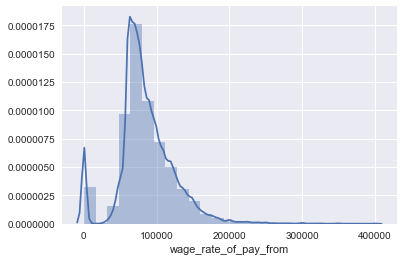

In [38]:
#check the imputation
sns.distplot(h1b['wage_rate_of_pay_from'],bins=25)

Similar to prevailing_wage these states have median 'wage_rate_of_pay_from' 400K. I will stop the imputation at this point and consider this data to be valid.

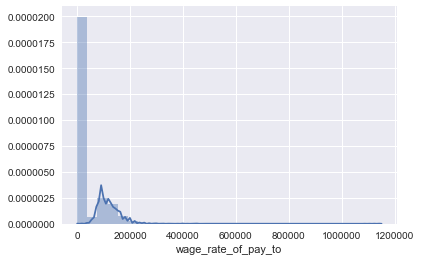

In [39]:
sns.distplot(h1b['wage_rate_of_pay_to'],bins=30)

'wage_rate_of_pay_to' is the maximum proposed rate by employer. In case of zero, the employer did not propose a maximum wage. From the graph, it seems there is considerable amount of data with value 0. Let us check value counts for this


In [40]:
h1b[h1b['wage_rate_of_pay_to']==0]['wage_rate_of_pay_to'].value_counts()

0.0    75607
Name: wage_rate_of_pay_to, dtype: int64

I will drop this column, since there is too much incompletely filled data and currently there is no way to correct this or get more insight to this for data imputation.

In [41]:
h1b = h1b.drop('wage_rate_of_pay_to',axis ='columns')

Check employer_country field and encode employer_name, employer_state,worksite_state,soc_name,pw_source_other using label encoder

In [42]:
h1b['employer_country'].value_counts()

UNITED STATES OF AMERICA    100157
CANADA                           4
Name: employer_country, dtype: int64

This is alarming since employers have to have branch in United States to apply for LCA for H1B petition. We will check for the correctness of this.

In [43]:
h1b[h1b.employer_country =='CANADA']

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
25437,21,10,27,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,78000.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,78000.0,Year,N,N,WA,98390.0,CERTIFIED
28135,25,10,31,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,117770.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,117770.0,Year,N,N,CA,94105.0,CERTIFIED
35275,17,10,8,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,ANALYSTS,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,Year,N,N,CA,94105.0,CERTIFIEDWITHDRAWN
53642,21,11,28,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,Year,N,N,CA,94105.0,CERTIFIED


We have only one employer with county as CANADA. Let us see if we can find the same employer within United states. Also note that the employer_state for this is NaN, so we will have to either impute or delete this record. Let us dig a little more to find the correct values for this employer.

In [44]:
emp = h1b[h1b.employer_country =='CANADA'].employer_name.unique()
h1b[h1b.employer_name.isin(emp)]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,employer_country,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
25437,21,10,27,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,78000.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,78000.0,Year,N,N,WA,98390.0,CERTIFIED
28135,25,10,31,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,117770.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,117770.0,Year,N,N,CA,94105.0,CERTIFIED
35275,17,10,8,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,ANALYSTS,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,Year,N,N,CA,94105.0,CERTIFIEDWITHDRAWN
53642,21,11,28,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,Year,N,N,CA,94105.0,CERTIFIED


In [45]:
#let us check for the values in our master table (unfiltered one) and try our luck
data[data.EMPLOYER_NAME.isin(emp)]

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
27281,21,10,2016,27,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,78000.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,78000.0,100000.0,Year,N,N,WA,98390,CERTIFIED
30127,25,10,2016,31,10,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,117770.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,117770.0,142990.0,Year,N,N,CA,94105,CERTIFIED
37690,17,10,2016,8,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,ANALYSTS,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,274990.0,Year,N,N,CA,94105,CERTIFIEDWITHDRAWN
56910,21,11,2016,28,11,2016,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,214947.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,214947.0,274990.0,Year,N,N,CA,94105,CERTIFIED
98335,3,1,2017,9,1,2017,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,134389.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,134389.0,174999.0,Year,N,N,CA,94105,CERTIFIED
223194,1,3,2017,7,3,2017,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,98987.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,98987.0,119999.0,Year,N,N,CA,94105,CERTIFIED
327527,15,3,2017,21,3,2017,H1B,LULULEMON USA INC,CA,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,4481.0,1,Y,136573.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,136573.0,145310.0,Year,N,N,CA,94105,CERTIFIED
339309,16,3,2017,22,3,2017,H1B,LULULEMON USA INC,NaN,CANADA,COMPUTER OCCUPATION,4481.0,1,Y,117770.0,Year,OES,2016.0,OFLC ONLINE DATA CENTER,117770.0,136573.0,Year,N,N,CA,94105,CERTIFIED


Bingo! There it is. I found one value for the same employer_name where they have country as USA. Another thing to notice is that they have same NAICS_CODE, which ensures that this is the same employer we want to impute.

Based on this finding, I can change the employer_country to USA and employer_state to CA.

In [46]:
row_index = h1b.index[h1b['employer_country']=='CANADA']
h1b.loc[row_index,['employer_state','employer_country']] = ('CA','UNITED STATES OF AMERICA')

In [47]:
#check for imputed values
h1b.loc[row_index,['employer_state','employer_country']]

,employer_state,employer_country
25437,CA,UNITED STATES OF AMERICA
28135,CA,UNITED STATES OF AMERICA
35275,CA,UNITED STATES OF AMERICA
53642,CA,UNITED STATES OF AMERICA


In [48]:
#do value_count again on employer_country
h1b.employer_country.value_counts()

UNITED STATES OF AMERICA    100161
Name: employer_country, dtype: int64

In [49]:
#employer_country is only USA, we can delete this column since it does not add significance to our dataset.
h1b.drop('employer_country',axis = 'columns',inplace=True)

Let us handle the missing values in our data set now.

In [50]:
h1b.isnull().sum()

case_submitted_day          0
case_submitted_month        0
decision_day                0
decision_month              0
decision_year               0
visa_class                  0
employer_name               6
employer_state              0
soc_name                    0
naics_code                  0
total_workers               0
full_time_position          0
prevailing_wage             1
pw_unit_of_pay              9
pw_source                   7
pw_source_year              8
pw_source_other             0
wage_rate_of_pay_from       0
wage_unit_of_pay            0
h1b_dependent            3420
willful_violator         3420
worksite_state              0
worksite_postal_code        0
case_status                 0
dtype: int64

In [51]:
#check for null values in employer_name
h1b[h1b.employer_name.isnull()]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
826,27,9,3,10,2016,H1B,NaN,PR,COMPUTER OCCUPATION,6113.0,1,Y,46793.00,Year,Other,2016.0,OFLC ONLINE DATA CENTER,65400.00,Year,N,N,PR,778.0,CERTIFIED
3951,30,9,6,10,2016,H1B,NaN,CA,EDUCATION,541511.0,1,Y,135262.00,Year,Other,2016.0,OFLC ONLINE DATA CENTER,135262.00,Year,Y,N,CA,92656.0,CERTIFIED
5296,3,10,6,10,2016,H1B,NaN,NJ,MANAGERS,541511.0,1,Y,84864.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,94000.00,Year,Y,N,NJ,8837.0,DENIED
8094,11,10,11,10,2016,H1B,NaN,IL,REPORTERS AND CORRESPONDENTS,541519.0,1,Y,102003.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,102100.00,Year,N,N,IL,94583.0,WITHDRAWN
46714,14,11,18,11,2016,H1B,NaN,TX,COMPUTER OCCUPATION,42393.0,1,N,28.44,Hour,OES,2016.0,OFLC ONLINE DATA CENTER,28.44,Hour,N,N,TX,76011.0,CERTIFIED
60701,23,11,6,12,2016,H1B,NaN,GA,ANALYSTS,541511.0,1,Y,70034.00,Year,Other,2016.0,OFLC ONLINE DATA CENTER,90000.00,Year,Y,N,GA,30328.0,CERTIFIEDWITHDRAWN


The NAICS code is defined as 'Industry code associated with the employer requesting permanent labor condition, as classified by the North American Industrial Classification System (NAICS)'
I can try to look up for the unique employer name based on NAICS code.

In [52]:
#try to find employer for NAICS code = 6113
h1b[h1b.naics_code == 6113.0][['employer_name','naics_code']].groupby(['naics_code','employer_name']).size().to_frame()

0
naics_code employer_name                                         
6113.0     APOLLIDON LLC                                        1
           AUBURN UNIVERSITY                                    5
           BOARD OF REGENTS NEVADA SYS OF HIGHER EDU GREAT...   1
           CALIFORNIA PREPARATORY COLLEGE                       1
           CANISIUS COLLEGE                                     2
           CENTRAL ALABAMA COMMUNITY COLLEGE                    2
           CORNELL UNIVERSITY                                  29
           DEVRY EDUCATION GROUP                                1
           ECPI UNIVERSITY LLC                                  1
           HOUSTON COMMUNITY COLLEGE FOUNDATION                 2
           LAKE SUPERIOR STATE UNIVERSITY                       1
           MASSACHUSETTS INSTITUTE OF TECHNOLOGY               57
           MASSACHUSETTS INSTITUTE OF TECHNOLOGY MIT            2
           MASSACHUSETTS INSTITUTE OF TECHNOLOGYMIT             3
           NINE STAR UNIVERSITY OF HEALTH SCIENCES              1
           NORTHEASTERN STATE UNIVERSITY                        1
           OHIO INSTITUTE OF ALLIED HEALTH                      2
           OLIVET UNIVERSITY                                    4
           PACIFIC UNION COLLEGE                                1
           SAINT LEO UNIVERSITY                                 3
           THE CURATORS OF THE UNIVERSITY OF MISSOURI           1
           THE UNIVERSITY OF AKRON                              2
           THE UNIVERSITY OF TEXAS AT DALLAS                   11
           UNIVERSIDAD DEL TURABO                               3
           UNIVERSITY OF IDAHO                                  5
           UNIVERSITY OF NORTH CAROLINA AT ASHEVILLE            2
           UNIVERSITY OF WISCONSIN STOUT                        1
           UTAH STATE UNIVERSITY                                1

It is not possible to find a unique employer_name based on NAICS code in our dataset. 

Unfortunately, the only way left for me is to delete these entries from our dataset.

In [53]:
h1b = h1b[h1b.employer_name.notnull()]

check null values in pw_unit_of_pay

In [54]:
h1b[h1b.pw_unit_of_pay.isnull()]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
1306,28,9,3,10,2016,H1B,DOUGLAS COUNTY,IL,MARKETING,9211.0,2,Y,64834.00,NaN,NaN,NaN,NONE,105000.0,Year,Y,N,IL,61944.0,DENIED
12534,7,10,14,10,2016,E3 Australian,SIM VIDEO LOS ANGELES INC,CA,COMPUTER OCCUPATION,512191.0,1,Y,35.13,NaN,NaN,NaN,NONE,20.0,Hour,NaN,NaN,CA,90038.0,DENIED
48490,17,11,21,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,PUBLIC RELATIONS,541611.0,1,Y,87838.00,NaN,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
57371,28,11,30,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,MARKETING,541611.0,1,Y,95326.50,NaN,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
59222,29,11,2,12,2016,H1B,DAN BRADLEY GLASS SHOP INC,NV,SCIENTIST,238150.0,1,Y,25.18,NaN,NaN,NaN,NONE,9.0,Hour,N,N,NV,89102.0,DENIED
71022,9,12,14,12,2016,H1B,UNIVERSITY OF COLORADO,CO,COUNSELORS,611310.0,1,Y,41288.00,NaN,OES,2016.0,OFLC ONLINE DATA CENTER,62000.0,Year,N,N,CO,80045.0,DENIED
76848,17,12,20,12,2016,H1B,AG ENGINEERING GROUP INC,CA,MULTIMEDIA ARTISTS AND ANIMATORS,5413.0,1,N,20.00,NaN,Other,2015.0,NONE,20.0,Hour,Y,N,CA,92612.0,DENIED
78290,19,12,21,12,2016,E3 Australian,THE GUARANTEE COMPANY OF NORTH AMERICA USA,MI,SCIENTIST,524126.0,1,Y,69825.50,NaN,NaN,NaN,NONE,90000.0,Year,NaN,NaN,MI,48076.0,DENIED
89481,30,12,4,1,2017,H1B,OPTIMUS CONSTRUCTION INC,CA,DOCTORS,236116.0,1,Y,94619.00,NaN,NaN,NaN,NONE,80000.0,Year,N,N,CA,91201.0,DENIED


The prevailing wage for these rows is 0 as well except for two cases.
Only these two rows can be imputed here based on the fields wage_rate_of_pay_from and wage_unit_of_pay. Let us go ahead and impute values for these two rows.

In [55]:
row_index = h1b.index[(h1b.pw_unit_of_pay.isnull()) & (h1b.prevailing_wage !=0.0)]

for index in row_index:
    unit= h1b.loc[index,'wage_unit_of_pay']
    h1b.loc[index,'pw_unit_of_pay'] =unit

#manually impute the values to save some time, although I should search later for a proper way to impute these values
#h1b.loc[row_index[0],'pw_unit_of_pay'] ='Year'
#h1b.loc[row_index[1],'pw_unit_of_pay'] = 'Hour'

In [56]:
print row_index

Int64Index([1306, 12534, 48490, 57371, 59222, 71022, 76848, 78290, 89481], dtype='int64')


In [57]:
#check for imputed values
h1b.loc[row_index]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
1306,28,9,3,10,2016,H1B,DOUGLAS COUNTY,IL,MARKETING,9211.0,2,Y,64834.00,Year,NaN,NaN,NONE,105000.0,Year,Y,N,IL,61944.0,DENIED
12534,7,10,14,10,2016,E3 Australian,SIM VIDEO LOS ANGELES INC,CA,COMPUTER OCCUPATION,512191.0,1,Y,35.13,Hour,NaN,NaN,NONE,20.0,Hour,NaN,NaN,CA,90038.0,DENIED
48490,17,11,21,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,PUBLIC RELATIONS,541611.0,1,Y,87838.00,Year,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
57371,28,11,30,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,MARKETING,541611.0,1,Y,95326.50,Year,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
59222,29,11,2,12,2016,H1B,DAN BRADLEY GLASS SHOP INC,NV,SCIENTIST,238150.0,1,Y,25.18,Hour,NaN,NaN,NONE,9.0,Hour,N,N,NV,89102.0,DENIED
71022,9,12,14,12,2016,H1B,UNIVERSITY OF COLORADO,CO,COUNSELORS,611310.0,1,Y,41288.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,62000.0,Year,N,N,CO,80045.0,DENIED
76848,17,12,20,12,2016,H1B,AG ENGINEERING GROUP INC,CA,MULTIMEDIA ARTISTS AND ANIMATORS,5413.0,1,N,20.00,Hour,Other,2015.0,NONE,20.0,Hour,Y,N,CA,92612.0,DENIED
78290,19,12,21,12,2016,E3 Australian,THE GUARANTEE COMPANY OF NORTH AMERICA USA,MI,SCIENTIST,524126.0,1,Y,69825.50,Year,NaN,NaN,NONE,90000.0,Year,NaN,NaN,MI,48076.0,DENIED
89481,30,12,4,1,2017,H1B,OPTIMUS CONSTRUCTION INC,CA,DOCTORS,236116.0,1,Y,94619.00,Year,NaN,NaN,NONE,80000.0,Year,N,N,CA,91201.0,DENIED


Check for null values in pw_source and pw_source_year

In [58]:
h1b[h1b[['pw_source','pw_source_year']].isnull().all(1)]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
1306,28,9,3,10,2016,H1B,DOUGLAS COUNTY,IL,MARKETING,9211.0,2,Y,64834.00,Year,NaN,NaN,NONE,105000.0,Year,Y,N,IL,61944.0,DENIED
12534,7,10,14,10,2016,E3 Australian,SIM VIDEO LOS ANGELES INC,CA,COMPUTER OCCUPATION,512191.0,1,Y,35.13,Hour,NaN,NaN,NONE,20.0,Hour,NaN,NaN,CA,90038.0,DENIED
48490,17,11,21,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,PUBLIC RELATIONS,541611.0,1,Y,87838.00,Year,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
57371,28,11,30,11,2016,E3 Australian,BRIDGEWATER CONSULTING GROUP INC,CA,MARKETING,541611.0,1,Y,95326.50,Year,NaN,NaN,NONE,150000.0,Year,NaN,NaN,CA,92618.0,DENIED
59222,29,11,2,12,2016,H1B,DAN BRADLEY GLASS SHOP INC,NV,SCIENTIST,238150.0,1,Y,25.18,Hour,NaN,NaN,NONE,9.0,Hour,N,N,NV,89102.0,DENIED
78290,19,12,21,12,2016,E3 Australian,THE GUARANTEE COMPANY OF NORTH AMERICA USA,MI,SCIENTIST,524126.0,1,Y,69825.50,Year,NaN,NaN,NONE,90000.0,Year,NaN,NaN,MI,48076.0,DENIED
89481,30,12,4,1,2017,H1B,OPTIMUS CONSTRUCTION INC,CA,DOCTORS,236116.0,1,Y,94619.00,Year,NaN,NaN,NONE,80000.0,Year,N,N,CA,91201.0,DENIED


Let us impute values for these columns based on the most common values.

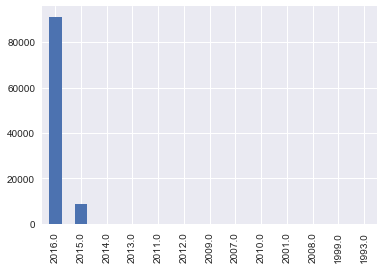

In [59]:
h1b.pw_source_year.value_counts().plot(kind = 'bar')

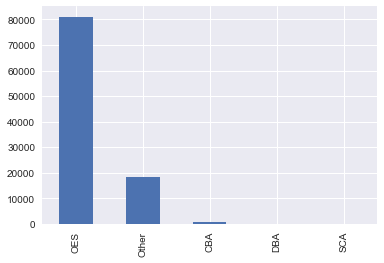

In [60]:
h1b.pw_source.value_counts().plot(kind='bar')

In [61]:
row_index = h1b.index[h1b[['pw_source','pw_source_year']].isnull().all(1)]
h1b.loc[row_index,['pw_source','pw_source_year']] = ('OES',2016)
#print row_index

In [62]:
h1b.loc[row_index,['pw_source','pw_source_year']]

,pw_source,pw_source_year
1306,OES,2016.0
12534,OES,2016.0
48490,OES,2016.0
57371,OES,2016.0
59222,OES,2016.0
78290,OES,2016.0
89481,OES,2016.0


Now let us check ['h1b_dependent','willful_violator'] for null values.

In [63]:
h1b[h1b[['h1b_dependent','willful_violator']].isnull().any(1)]

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
42,14,3,3,10,2016,E3 Australian,SKADDEN ARPS SLATE MEAGHER and FLOM LLP,NY,ANALYSTS,541110.0,1,Y,210704.00,Year,OES,2015.0,OFLC ONLINE DATA CENTER,280000.00,Year,NaN,NaN,NY,10036.0,CERTIFIEDWITHDRAWN
53,1,4,3,10,2016,E3 Australian,HOWARD HUGHES MEDICAL INSTITUTE,MD,ANALYSTS,541710.0,1,Y,50440.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,53000.00,Year,NaN,NaN,CA,94158.0,CERTIFIEDWITHDRAWN
63,8,6,3,10,2016,E3 Australian,MICHAEL PAGE INTERNATIONAL INC,CT,ANALYSTS,541612.0,1,Y,45282.00,Year,OES,2015.0,OFLC ONLINE DATA CENTER,75000.00,Year,NaN,NaN,NY,10017.0,CERTIFIEDWITHDRAWN
99,27,9,3,10,2016,E3 Australian,ABBVIE INC,IL,ANALYSTS,3254.0,1,Y,119683.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,354900.00,Year,NaN,NaN,IL,60064.0,CERTIFIED
140,27,9,3,10,2016,E3 Australian,AHOLD USA INC,MA,ANALYSTS,445110.0,1,Y,71425.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,71425.00,Year,NaN,NaN,MA,2021.0,CERTIFIED
146,27,9,3,10,2016,E3 Australian,ALIXPARTNERS LLP,MI,ANALYSTS,541611.0,1,Y,110219.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,205000.00,Year,NaN,NaN,NY,10022.0,CERTIFIED
149,27,9,3,10,2016,H1B1 Chile,AMAZON CORPORATE LLC,WA,ANALYSTS,454111.0,1,Y,129064.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,145000.00,Year,NaN,NaN,WA,98109.0,CERTIFIED
150,27,9,3,10,2016,E3 Australian,AMAZON CORPORATE LLC,WA,ANALYSTS,454111.0,1,Y,153213.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,155000.00,Year,NaN,NaN,WA,98101.0,CERTIFIED
180,27,9,3,10,2016,E3 Australian,ANTHEM INC,CA,ANALYSTS,524114.0,1,Y,127150.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,127150.00,Year,NaN,NaN,IN,46204.0,CERTIFIED
215,27,9,3,10,2016,E3 Australian,BAKER HUGHES INCORPORATED,TX,ANALYSTS,541330.0,1,Y,152464.00,Year,OES,2016.0,OFLC ONLINE DATA CENTER,156750.00,Year,NaN,NaN,TX,77375.0,CERTIFIED


Since these two fields are related with employer_name, we can check for the other cases from the same employer and see if there is any value for these fields. Based on these values we can impute the null values.

In [64]:
def imputer_binary(impute_column):
    #get index of all rows with null values
    row_index = h1b.index[h1b[impute_column].isnull()]
    for index in row_index:
        #get employer_name 
        emp_name = h1b.loc[index,'employer_name']
        #check for impute_column value
        value_arr = h1b[(h1b.employer_name == emp_name) & (~h1b[impute_column].isnull())][impute_column]
        #print index
        #print value_arr
        #check if there is a valid value
        if not(value_arr.empty):
            value = value_arr.values[0]
            h1b.loc[index,impute_column] = value

In [65]:
#impute values for 'h1b_dependent'
imputer_binary('h1b_dependent')

In [66]:
#impute values for 'willful_violator'
imputer_binary('willful_violator')

In [67]:
#check for remaining null values
h1b[['h1b_dependent','willful_violator']].isnull().sum()

h1b_dependent       1862
willful_violator    1862
dtype: int64

In [68]:
#so our null value number reduced significantly.
#let us check for remaining null values in our dataset
h1b[h1b[['pw_unit_of_pay','pw_source_year','h1b_dependent','willful_violator']].isnull().any(1)].groupby('case_status').size().to_frame()


,0
case_status,
CERTIFIED,1494
CERTIFIEDWITHDRAWN,123
DENIED,185
WITHDRAWN,61


Remove all the remaining null values from dataset.

In [69]:
h1b.dropna(axis = 0, how = 'any',inplace = True)

In [70]:
h1b.isnull().sum().sum()

0L

In [71]:
print 'Shape of cleaned dataset: ',h1b.shape
print 'Case status value counts\n',h1b.case_status.value_counts()


Shape of cleaned dataset:  (98292, 24)
Case status value counts
CERTIFIED             79974
CERTIFIEDWITHDRAWN    14309
WITHDRAWN              2787
DENIED                 1222
Name: case_status, dtype: int64


In [72]:
#save the cleaned dataset on disk
h1b.to_csv('H1B Disclosure Dataset Files//h1b_cleaned_2016.csv',index = False)

## Data Exploration

In [73]:
h1b.describe().T

,count,mean,std,min,25%,50%,75%,max
case_submitted_day,98292.0,16.008241,8.862251,1.00,8.0,16.0,23.000,31.0
case_submitted_month,98292.0,10.070647,2.518030,1.00,10.0,11.0,12.000,12.0
decision_day,98292.0,15.473274,8.780985,1.00,7.0,15.0,22.000,31.0
decision_month,98292.0,9.910766,3.002826,1.00,10.0,11.0,12.000,12.0
decision_year,98292.0,2016.130855,0.337243,2016.00,2016.0,2016.0,2016.000,2017.0
naics_code,98292.0,432357.674144,207676.840635,1114.00,423430.0,541511.0,541511.000,928120.0
total_workers,98292.0,1.964870,4.813152,1.00,1.0,1.0,1.000,155.0
prevailing_wage,98292.0,75340.059443,31082.581100,7.25,59218.0,72758.0,91274.000,249891.0
pw_source_year,98292.0,2015.904204,0.341516,1993.00,2016.0,2016.0,2016.000,2016.0
wage_rate_of_pay_from,98292.0,85918.829978,38294.371799,7.26,65000.0,80000.0,104229.475,400000.0


In [74]:
cols,num_cols,cat_cols = get_column_names(h1b)
print num_cols
print cat_cols

['case_submitted_day' 'case_submitted_month' 'decision_day'
 'decision_month' 'decision_year' 'naics_code' 'total_workers'
 'prevailing_wage' 'pw_source_year' 'wage_rate_of_pay_from'
 'worksite_postal_code']
['visa_class', 'employer_name', 'employer_state', 'soc_name', 'full_time_position', 'pw_unit_of_pay', 'pw_source', 'pw_source_other', 'wage_unit_of_pay', 'h1b_dependent', 'willful_violator', 'worksite_state', 'case_status']


In [75]:
h1b[cat_cols].describe(include='all').T

,count,unique,top,freq
visa_class,98292,4,H1B,96570
employer_name,98292,15465,INFOSYS LIMITED,3937
employer_state,98292,56,CA,15857
soc_name,98292,56,COMPUTER OCCUPATION,46145
full_time_position,98292,2,Y,96816
pw_unit_of_pay,98292,5,Year,93413
pw_source,98292,5,OES,79510
pw_source_other,98292,88,OFLC ONLINE DATA CENTER,92122
wage_unit_of_pay,98292,5,Year,93429
h1b_dependent,98292,2,N,59355


In [76]:
#Different Visa types applying for LCA
h1b.visa_class.value_counts()

H1B               96570
E3 Australian      1455
H1B1 Singapore      169
H1B1 Chile           98
Name: visa_class, dtype: int64

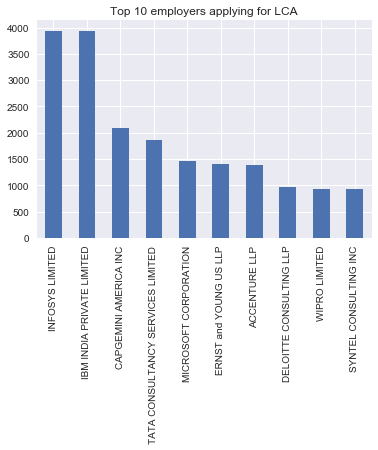

In [77]:
#top employers applying for LCA
h1b.employer_name.value_counts()[:10].plot(kind='bar',title = 'Top 10 employers applying for LCA')
plt.show()

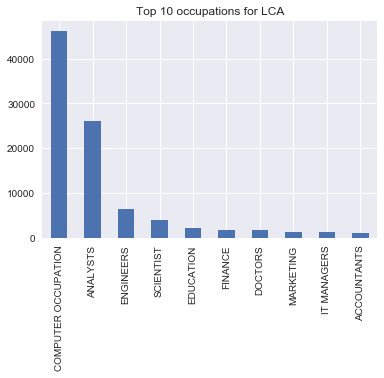

In [78]:
h1b.soc_name.value_counts()[:10].plot(kind='bar',title = 'Top 10 occupations for LCA')
plt.show()

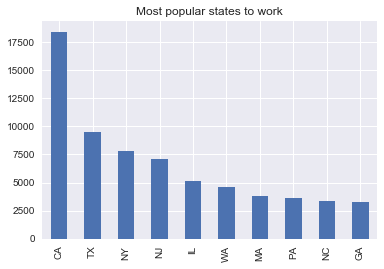

In [79]:
#Most popular states to work in
h1b.worksite_state.value_counts()[:10].plot(kind = 'bar', title = 'Most popular states to work')
plt.show()

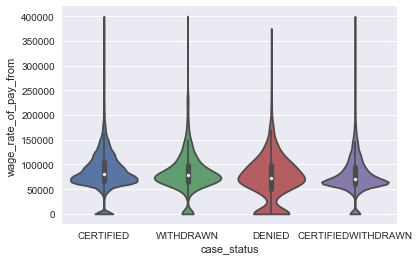

In [80]:
#
sns.violinplot(x='case_status',y='wage_rate_of_pay_from',data=h1b,\
               order = ['CERTIFIED','WITHDRAWN','DENIED','CERTIFIEDWITHDRAWN'],\
               scale='width',cut=0)

plt.show()

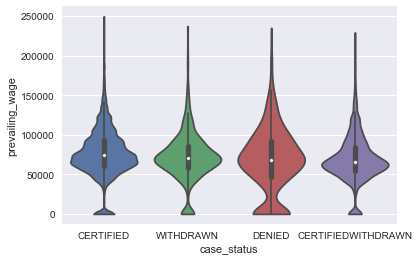

In [81]:
sns.violinplot(x='case_status',y='prevailing_wage',data=h1b,\
               order = ['CERTIFIED','WITHDRAWN','DENIED','CERTIFIEDWITHDRAWN'],\
              cut = 0,scale = 'width')

plt.show()

## Data Preprocessing

In [82]:
from sklearn import preprocessing

In [83]:
#label encode the features
le = preprocessing.LabelEncoder()
features_to_encode = ['employer_name','employer_state','soc_name','pw_source_other','worksite_state']

for i in features_to_encode:
    enc = le.fit(np.unique(h1b[i].values))
    print enc.classes_
    h1b[i] = le.fit_transform(h1b[i])


['0' '0965688 BC LTD' '1 800 FLOWERSCOM INC' ..., 'ZYNGA INC'
 'ZYPMEDIA INC' 'ZZ VENTURES INC']
['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
['ACCOUNTANTS' 'ACTUARIES' 'AGRICULTURE' 'ANALYSTS' 'ANIMAL HUSBANDARY'
 'ARCHITECTURE' 'BUSINESS OPERATIONS SPECIALIST' 'CHIEF EXECUTIVES'
 'COACHES AND SCOUTS' 'COMMUNICATIONS' 'COMPUTER OCCUPATION' 'CONSTRUCTION'
 'COUNSELORS' 'CURATORS' 'DESIGNERS' 'DOCTORS' 'ECONOMISTS' 'EDUCATION'
 'ENGINEERS' 'ENGINEERS ' 'ENTERTAINMENT' 'EVENT PLANNERS'
 'FASHION DESIGNERS' 'FINANCE' 'FIRST LINE SUPERVISORS' 'FITNESS TRAINERS'
 'FOOD PREPARATION WORKERS' 'GRAPHIC DESIGNERS' 'HEALTHCARE' 'HISTORIANS'
 'HUMAN RESOURCES' 'INSURANCE' 'INTERNIST' 'INTERPRETERS AND TRANSLATORS'
 'IT MANAGERS' 'LAB TECHNICIANS' 'LAWYERS AND LE

#### Correlation between all variables and different case status classes

In [86]:
corr = (pd.get_dummies(h1b)).corr()

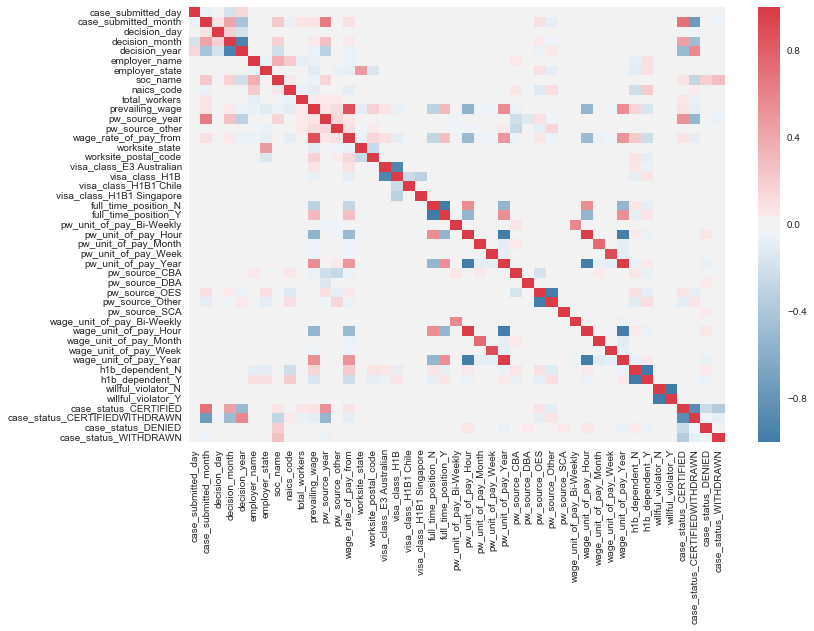

In [87]:
sns.set()
plt.subplots(figsize = (12,8))
color = sns.diverging_palette(240, 10, n=9,as_cmap= True)
sns.heatmap(corr,center= 0,cmap = color)
plt.show()

In [88]:
#Label encode target variable
enc = le.fit(np.unique(h1b.case_status))
print enc.classes_
h1b.case_status = le.transform(h1b.case_status)

['CERTIFIED' 'CERTIFIEDWITHDRAWN' 'DENIED' 'WITHDRAWN']


In [89]:
h1b.head()

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,visa_class,employer_name,employer_state,soc_name,naics_code,total_workers,full_time_position,prevailing_wage,pw_unit_of_pay,pw_source,pw_source_year,pw_source_other,wage_rate_of_pay_from,wage_unit_of_pay,h1b_dependent,willful_violator,worksite_state,worksite_postal_code,case_status
0,24,2,1,10,2016,H1B,3883,16,3,522210.0,1,Y,59197.0,Year,OES,2015.0,63,65811.0,Year,N,N,15,60015.0,1
1,4,3,1,10,2016,H1B,3805,16,3,522210.0,1,Y,49800.0,Year,Other,2015.0,86,53000.0,Year,N,N,15,60015.0,1
2,10,3,1,10,2016,H1B,4156,8,3,541511.0,2,Y,76502.0,Year,OES,2015.0,63,77000.0,Year,Y,N,7,20007.0,1
3,28,9,1,10,2016,H1B,6580,24,10,541511.0,1,Y,90376.0,Year,OES,2016.0,63,102000.0,Year,Y,N,33,7302.0,3
4,25,2,2,10,2016,H1B,2753,34,10,541511.0,1,Y,52915.0,Year,Other,2015.0,65,61000.0,Year,Y,N,33,8837.0,1


In [90]:
#create dummy variables for listed columns
h1b_dummy = pd.get_dummies(h1b)
h1b_dummy.head()

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,employer_name,employer_state,soc_name,naics_code,total_workers,prevailing_wage,pw_source_year,pw_source_other,wage_rate_of_pay_from,worksite_state,worksite_postal_code,case_status,visa_class_E3 Australian,visa_class_H1B,visa_class_H1B1 Chile,visa_class_H1B1 Singapore,full_time_position_N,full_time_position_Y,pw_unit_of_pay_Bi-Weekly,pw_unit_of_pay_Hour,pw_unit_of_pay_Month,pw_unit_of_pay_Week,pw_unit_of_pay_Year,pw_source_CBA,pw_source_DBA,pw_source_OES,pw_source_Other,pw_source_SCA,wage_unit_of_pay_Bi-Weekly,wage_unit_of_pay_Hour,wage_unit_of_pay_Month,wage_unit_of_pay_Week,wage_unit_of_pay_Year,h1b_dependent_N,h1b_dependent_Y,willful_violator_N,willful_violator_Y
0,24,2,1,10,2016,3883,16,3,522210.0,1,59197.0,2015.0,63,65811.0,15,60015.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0
1,4,3,1,10,2016,3805,16,3,522210.0,1,49800.0,2015.0,86,53000.0,15,60015.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0
2,10,3,1,10,2016,4156,8,3,541511.0,2,76502.0,2015.0,63,77000.0,7,20007.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,28,9,1,10,2016,6580,24,10,541511.0,1,90376.0,2016.0,63,102000.0,33,7302.0,3,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
4,25,2,2,10,2016,2753,34,10,541511.0,1,52915.0,2015.0,65,61000.0,33,8837.0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0


#### Seperate Target variable from features

In [91]:
y = h1b_dummy['case_status']

In [92]:
y.head()

0    1
1    1
2    1
3    3
4    1
Name: case_status, dtype: int64

In [93]:
x = h1b_dummy.drop('case_status',axis = 'columns')
x.head()

,case_submitted_day,case_submitted_month,decision_day,decision_month,decision_year,employer_name,employer_state,soc_name,naics_code,total_workers,prevailing_wage,pw_source_year,pw_source_other,wage_rate_of_pay_from,worksite_state,worksite_postal_code,visa_class_E3 Australian,visa_class_H1B,visa_class_H1B1 Chile,visa_class_H1B1 Singapore,full_time_position_N,full_time_position_Y,pw_unit_of_pay_Bi-Weekly,pw_unit_of_pay_Hour,pw_unit_of_pay_Month,pw_unit_of_pay_Week,pw_unit_of_pay_Year,pw_source_CBA,pw_source_DBA,pw_source_OES,pw_source_Other,pw_source_SCA,wage_unit_of_pay_Bi-Weekly,wage_unit_of_pay_Hour,wage_unit_of_pay_Month,wage_unit_of_pay_Week,wage_unit_of_pay_Year,h1b_dependent_N,h1b_dependent_Y,willful_violator_N,willful_violator_Y
0,24,2,1,10,2016,3883,16,3,522210.0,1,59197.0,2015.0,63,65811.0,15,60015.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0
1,4,3,1,10,2016,3805,16,3,522210.0,1,49800.0,2015.0,86,53000.0,15,60015.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0
2,10,3,1,10,2016,4156,8,3,541511.0,2,76502.0,2015.0,63,77000.0,7,20007.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
3,28,9,1,10,2016,6580,24,10,541511.0,1,90376.0,2016.0,63,102000.0,33,7302.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
4,25,2,2,10,2016,2753,34,10,541511.0,1,52915.0,2015.0,65,61000.0,33,8837.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0


In [94]:
x.shape

(98292, 41)

### Split the data into TrainTest Set

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y)

In [97]:
#function to scale features
def scale_features(features):
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(features)
    f_scaled = scaler.transform(features)
    return f_scaled

In [98]:
#Scale x_train features
x_train_scaled = scale_features(x_train)
x_test_scaled = scale_features(x_test)

In [99]:
np.set_printoptions(precision=2,suppress=True,linewidth=100)
print 'Train Scaled\n',x_train_scaled[:2]
print 'Test Scaled\n',x_test_scaled[:2]

Train Scaled
[[ 0.73  1.    0.97  1.    0.    0.52  0.18  0.18  0.58  0.    0.18  1.    0.72  0.15  0.8   0.29
   0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.
   0.    0.    0.    1.    0.    1.    1.    0.  ]
 [ 0.33  0.91  0.53  0.91  0.    1.    0.85  0.75  0.58  0.    0.24  1.    0.72  0.16  0.17  0.32
   0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.
   0.    0.    0.    1.    1.    0.    1.    0.  ]]
Test Scaled
[[ 0.73  1.    0.97  1.    0.    0.23  0.38  0.05  0.58  0.    0.17  1.    0.74  0.12  0.37  0.02
   0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    0.    1.    0.    0.
   0.    0.    0.    1.    1.    0.    1.    0.  ]
 [ 0.67  0.82  0.87  0.82  0.    0.19  0.44  0.18  0.58  0.    0.3   1.    0.72  0.19  0.63  0.88
   0.    1.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    0.
   0.    0.    0.    

### Models to Evaluate
    I will run following models to classify my Target variable.

- Linear Regression
- Naive Bayes
- Decision Tree
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Machine

    Since I am addressing a multiclass classification problem, working with just binary classifiers is not going to achieve good results. I will need to use advanced multiclass classification techniques. One such model is called One-Vs-The-Rest Classification where only one classifier per class is fitted. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier.
    
    I am going to run these models to determine baseline performance and then later I will select the best model to run hyperparameter tuning. The method used to compare model performance is average_precision_score from sklearn.metrics. I used f1-score 'weighted-precision' metric which calculates weighted average of F1-score for each class of target variable.

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

#model precision
from sklearn.metrics import accuracy_score,average_precision_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold

#hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

### Let us try to run the binary classification models without using OneVsTheRest classification

In [101]:
#fucntion to train the model, predict the outcome and evaluate the model on test
def fit_and_evaluate(x_train,y_train,x_test,y_test,model):
    
    # Train the model
    model.fit(x,y)
    
    # Make predictions and evalute
    model_pred = model.predict(x_test)
    model_accuracy = accuracy_score(y_test, model_pred)
    
    # Return the performance metric
    return model_accuracy

In [103]:
# fit Naive Bayes
nbclf = GaussianNB()
nb_mae = fit_and_evaluate(x_train_scaled,y_train,x_test_scaled,y_test,nbclf)

print 'Naive Bayes Performance on test data is: Accuracy = %.4f'%nb_mae

Naive Bayes Performance on test data is: Accuracy = 0.0124


In [105]:
# Fit Decision Tree classifier
dtclf = DecisionTreeClassifier()
dt_accuracy = fit_and_evaluate(x_train_scaled,y_train,x_test_scaled,y_test,dtclf)
print 'Decision Tree Performance on test data is: Accuracy = %.4f'%dt_accuracy

Decision Tree Performance on test data is: Accuracy = 0.1113


In [106]:
#fit random forest classifier
random_forest = RandomForestClassifier(random_state=60)
random_forest_accuracy = fit_and_evaluate(x_train_scaled,y_train,x_test_scaled,y_test,random_forest)
print 'Random Forest Accuracy on test Data: Accuracy = %.4f'%random_forest_accuracy

Random Forest Accuracy on test Data: Accuracy = 0.1456


In [107]:
#fit gradient boost classifier
gradient_boosted = GradientBoostingClassifier(random_state=60)
gradient_boosted_accuracy = fit_and_evaluate(x_train_scaled,y_train,x_test_scaled,y_test,gradient_boosted)
print 'Gradient Boosting Classifier Accuracy on test Data: Accuracy = %.4f'%gradient_boosted_accuracy

Gradient Boosting Classifier Accuracy on test Data: Accuracy = 0.0124


In [ ]:
#fit support vector machine
svm = LinearSVC(random_state =0)
svm_accuracy = fit_and_evaluate(x_train_scaled,y_train,x_test_scaled,y_test,svm)
print 'Support Vector Machine Classifier Accuracy on test Data: Accuracy = %.4f'%svm_accuracy

As we can clearly see, Only svm performed well in classifying the multiclass target variable. The accuracy is over 80%.Again, this could also be because of model overfitting.

All other models performed very poor on classification of multiclass problem. We achieved very low accuracy rate.

### Now let us run same models using OneVsRest Classifier

    We will use label_binarize() to binarize multiclass Target variable

from sklearn.multiclass import OneVsRestClassifier

In [177]:
#function to binarize the target variable
def binarize_target(y,classes):
    y_binary= preprocessing.label_binarize(y,classes = [0,1,2,3])
    n_classes = y_binary.shape[1]
    return y_binary,n_classes

In [195]:
#compute and return average precision
def compute_precision(y_test,y_pred,n_classes):
    
    average_precision = dict()
    for i in range(n_classes):
        average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

    # A "weighted-average": quantifying score on all classes jointly
    average_precision["weighted"] = average_precision_score(y_test, y_pred,
                                                         average="weighted")
    #print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    return average_precision["weighted"]

In [178]:
#function to measure performance of model
def model_performance(x,y,model,nfolds=5):
    skf = StratifiedKFold(n_splits=nfolds)
    folds = skf.split(x,y)
    #split y using label_binarize
    y_binary, n_classes = binarize_target(y,classes = [0,1,2,3])
    
    #print '\nFold\tPrecision_Train\tPrecision_Test'
    precision_train = 0
    precision_test = 0
    for train_index,test_index in folds:
        model.fit(x[train_index],y_binary[train_index])
        pred = model.predict(x[train_index])
        #compute training set precision score
        precision_train += compute_precision(y_binary[train_index],pred,n_classes)
        
        #compute training set precision score
        pred = model.predict(x[test_index])
        precision_test += compute_precision(y_binary[test_index],pred,n_classes)

    
    avg_precision_train = precision_train/nfolds
    avg_precision_test = precision_test/nfolds
    print 'Model Performance on Stratified-KFold folds: '
    print 'Average Precision Score on Training set: ',avg_precision_train
    print 'Average Precision Score on Test set: ', avg_precision_test
    return avg_precision_test
    

In [196]:
ovr_lr = OneVsRestClassifier(LinearRegression())
lr_avg_precision = model_performance(x_train_scaled,y_train,model=ovr_lr,nfolds=5)
#plot_precision_recall_curve(y_test_binary,pred,n_classes)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.852444436306
Average Precision Score on Test set:  0.852369735658


In [197]:
ovr_nb = OneVsRestClassifier(GaussianNB())
nb_avg_precision = model_performance(x_train_scaled,y_train,ovr_nb,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.770173908828
Average Precision Score on Test set:  0.76975379713


In [201]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
dt_avg_precision = model_performance(x_train_scaled,y_train,ovr_dt,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.99992114004
Average Precision Score on Test set:  0.942982358151


In [199]:
ovr_rf = OneVsRestClassifier(RandomForestClassifier(random_state=60))
rf_avg_precision = model_performance(x_train_scaled,y_train,ovr_rf,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.994494024681
Average Precision Score on Test set:  0.942379972128


In [200]:
ovr_gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=60))
gb_avg_precision = model_performance(x_train_scaled,y_train,ovr_gb,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.934493358444
Average Precision Score on Test set:  0.931450517355


In [122]:
ovr_svm = OneVsRestClassifier(LinearSVC(random_state=0))
svm_avg_precision = model_performance(x_train_scaled,y_train,ovr_svm,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.894888233941
Average Precision Score on Test set:  0.894782905395


### Model Performance Comparison

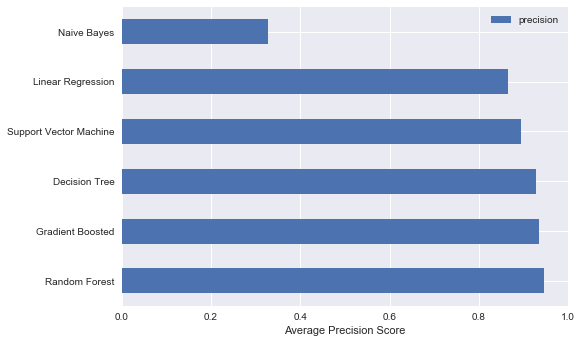

In [138]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Naive Bayes' , 'Decision Tree',
                                           'Random Forest', 'Gradient Boosted','Support Vector Machine'],
                                 'precision': [lr_avg_precision, nb_avg_precision, dt_avg_precision, 
                                         rf_avg_precision, gb_avg_precision, svm_avg_precision]})

model_comparison.sort_values('precision',ascending = False).plot(x = 'model',y = 'precision', kind = 'barh')

plt.ylabel('')
plt.xlabel('Average Precision Score')
plt.xlim((0,1))
plt.show()

###### Observation:
From these results, We can see that Random forest classifier outperformed all other algorithms. However, we are dealing with a multiclass problem with skewed data. This may lead to unbalanced precision in all of the classes of target variable. We need to check for acuracy of these models based on precision-recall curve as well before concluding anything.


Let us check the precision-recall curve for the best performing models.

### Plot Precision-Recall curve
Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

For more on Precision-Recall metric please refer http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#

In [212]:
# function to plot Precision-Recall curve for Case_Status classes
from itertools import cycle
def plot_precision_recall_curve(y_test_binary,pred,n_classes):
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binary[:, i],pred[:, i])
        average_precision[i] = average_precision_score(y_test_binary[:, i],pred[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binary.ravel(),
        pred.ravel())
    average_precision["micro"] = average_precision_score(y_test_binary, pred,
                                                         average="micro")
    
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
    case_class = ['CERTIFIED','CERTIFIEDWITHDRAWN','DENIED','WITHDRAWN']
    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    #set iso-f1 curves
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')

    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(case_class[i], average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for LCA Case Status classes')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=10))


    plt.show()

### Test our models on validation dataset

In [183]:
#convert y_test into label_binarizer
y_test_binary,n_classes = binarize_target(y_test,[0,1,2,3])

Average precision for Random Forest classifier:  0.932582493923


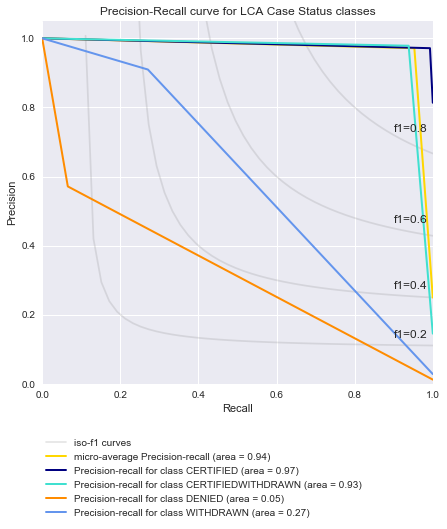

In [222]:
pred = ovr_rf.predict(x_test_scaled)
print 'Average precision for Random Forest classifier: ',compute_precision(y_test_binary,pred,n_classes)
plot_precision_recall_curve(y_test_binary,pred,n_classes)

Average precision for decision-tree:  0.936415932244


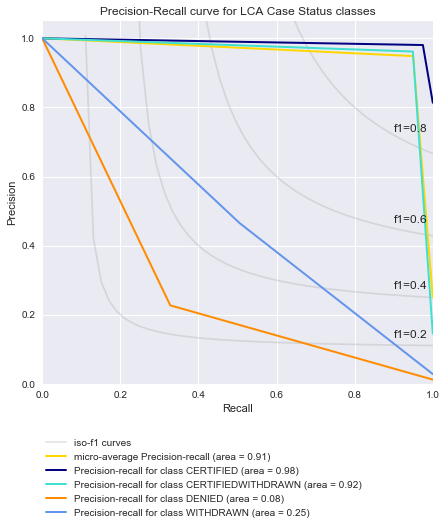

In [217]:
pred = ovr_dt.predict(x_test_scaled)
print 'Average precision for decision-tree: ',compute_precision(y_test_binary,pred,n_classes)
plot_precision_recall_curve(y_test_binary,pred,n_classes)

Average precision for gradient boost classifier:  0.928840640799


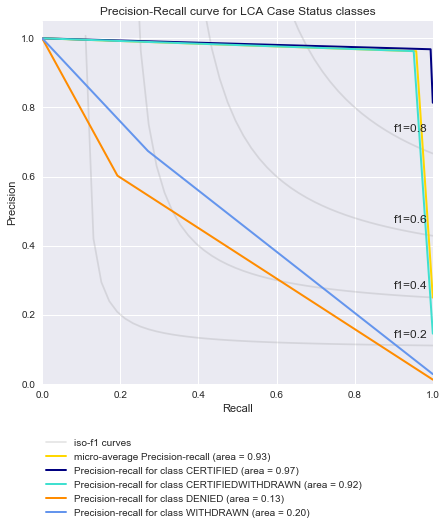

In [221]:
pred = ovr_gb.predict(x_test_scaled)
print 'Average precision for gradient boost classifier: ',compute_precision(y_test_binary,pred,n_classes)
plot_precision_recall_curve(y_test_binary,pred,n_classes)

Average precision for SVM classifier:  0.883115236927


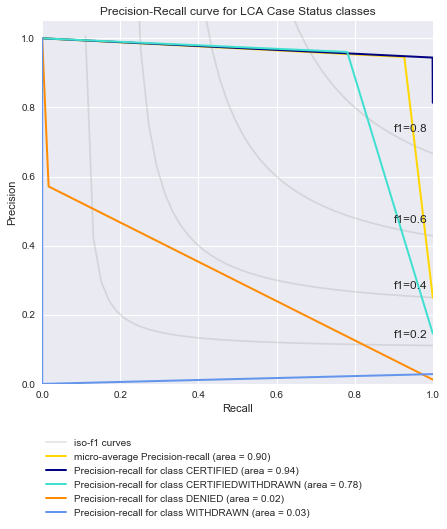

In [220]:
pred = ovr_svm.predict(x_test_scaled)
print 'Average precision for SVM classifier: ',compute_precision(y_test_binary,pred,n_classes)
plot_precision_recall_curve(y_test_binary,pred,n_classes)

### Feature Selection

Before moving to hyper-parameterization. Let us select only important features for our model.

In [139]:
from sklearn import feature_selection

In [148]:
#function to find best percentile
def best_percentile(x_train,y_train,method):
    
    percentiles = np.linspace(1,100,25)
    results = []
    for i in percentiles:
        fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile = i)
        x_train_fs = fs.fit_transform(x_train,y_train)
        #scores = cross_validation.cross_val_score(method,x_train_fs,y_train,cv = 5,scoring='neg_mean_absolute_error')
        #print i,abs(scores.mean())
        scores = model_performance(x_train_fs,y_train,method,5)
        results = np.append(results,abs(scores.mean()))
        
    optimal_percentage = np.where(results == results.max())[0]
    print 'Optimal_percentage: ',optimal_percentage
    print 'percentile: ', percentiles[optimal_percentage]
    return percentiles[optimal_percentage]

In [ ]:
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=30)
x_train_fs = fs.fit_transform(x_train,y_train)


In [145]:
best_percentile(x_train,y_train,ovr_rf)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.71211255345
Average Precision Score on Test set:  0.706273832899
Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.911190565839
Average Precision Score on Test set:  0.726102148805
Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.937131771674
Average Precision Score on Test set:  0.740485708337
Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.98667245985
Average Precision Score on Test set:  0.889816603627
Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.99002186174
Average Precision Score on Test set:  0.922823761665
Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.993098396348
Average Precision Score on Test set:  0.939810190768
Model Performance on Stratified-KFold folds: 
Average Precision Sco

In [147]:
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile = 23)
x_train_fs = fs.fit_transform(x_train,y_train)
#scores = cross_validation.cross_val_score(method,x_train_fs,y_train,cv = 5,scoring='neg_mean_absolute_error')
#print i,abs(scores.mean())
precision = model_performance(x_train_fs,y_train,ovr_rf,5)

Model Performance on Stratified-KFold folds: 
Average Precision Score on Training set:  0.995012073744
Average Precision Score on Test set:  0.94537139242


In [162]:
#get important features for each class of target attribute
n_classes = preprocessing.label_binarize(y_train,classes = [0,1,2,3]).shape[1]
for i in range(n_classes):
    print ovr_rf.estimators_[i].feature_importances_

[ 0.48  0.06  0.14  0.08  0.12  0.02  0.    0.03  0.03  0.04]
[ 0.49  0.06  0.18  0.08  0.12  0.01  0.    0.02  0.02  0.02]
[ 0.03  0.1   0.03  0.16  0.14  0.1   0.02  0.16  0.14  0.13]
[ 0.05  0.09  0.04  0.16  0.19  0.08  0.01  0.11  0.1   0.16]


###### Disclaimer: 
I need to research more on the feature selection process for multiclass classification problems. I have knowledge until getting the most important features for each class of target attribute but finding out which feature is which, seems another task to learn out of this project. The above output lists the most important features for predicting  the four classes of case_status namely 'CERTIFIED' = 0, 'CERTIFIEDWITHDRAWN' = 1, 'DENIED' = 2, 'WITHDRAWN' = 3.


I will not implement feature selection for this project and leave it as an area of improvement for future.

### Hyper parameter Tuning Gradient Boosting Classifier

In [188]:
y_train_binary,n_classes = binarize_target(y_train,[0,1,2,3])

In [163]:
#initialize a new instance
ovr_gb = OneVsRestClassifier(GradientBoostingClassifier(random_state=60))

In [224]:
ovr_gb.get_params()

{'estimator': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=60, subsample=1.0, verbose=0,
               warm_start=False),
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__presort': 'auto',
 'estimator__ran

In [226]:
# Loss function to be optimized
loss = ['deviance', 'exponential']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto','log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'estimator__loss': loss,
                       'estimator__n_estimators': n_estimators,
                       'estimator__max_depth': max_depth,
                       'estimator__min_samples_leaf': min_samples_leaf,
                       'estimator__min_samples_split': min_samples_split,
                       'estimator__max_features': max_features}

In [ ]:
#In the interest of time; just run the grid search for class 2: DENIED, in search of improving the precision of this class

grid_search = GridSearchCV(ovr_gb, param_grid=hyperparameter_grid,cv=None)

#for i in n_classes:
grid_search.fit(x_train_scaled,y_train_binary[:,2])


In [ ]:
best_ovr_gb = grid_search.best_estimator_
best_ovr_gb

In [ ]:
#train the best model on training data once more
gb_avg_precision = model_performance(x_train_scaled,y_train,best_ovr_gb,5)

In [ ]:
#run the model on validation data to check the effectiveness
pred = best_ovr_gb.predict(x_test_scaled)
print 'Average precision for gradient boost classifier: ',compute_precision(y_test_binary,pred,n_classes)
plot_precision_recall_curve(y_test_binary,pred,n_classes)

###### Note:
The grid search took really long time to complete in my machine. so the final plots could not be plotted.

###### Conclusion:
In this analysis, our main goal was to be able to predict the case status of LCA applications that the employers submit to OFLC. We were dealing with the multiclass classification problem trying to predict the case status of four classes: [Certified, Certified-Withdrawn, Withdrawn, Denied]. We witnessed that our dataset was biased based on case status classes. We had more records for Certified, Certified-withdrawn classes and very few records for withdrawn and denied classes. We tried our best to preserve and correct the corrupt data as per our knowledge. As a result of this, our model accuracy came pretty high at 93-94%. These are good accuracy scores. However, our model was able to predict two most occurring classes really well and the other less frequent classes were not classified that well. We tried to improve our results by running the hyper-parameterization but that helped only little. At the end, we can conclude that our model can still be improved by trying even more rigorous hyper-parameterization. If this does not help then we can try adding more records of the less frequent classes to make our data unbiased.